In [1]:
import pandas as pd
import numpy as np

from tkinter import filedialog as fd
from tkinter import Tk, BOTH

from datetime import datetime
from datetime import timedelta

from scipy import stats
from scipy.stats import binom
from sympy import *

import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:,.4f}'.format

import warnings
warnings.filterwarnings("ignore")

from typing import Tuple

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" #print all out

## Задача 1.

В городе $4$ коммерческих банка. У каждого риск банкротства в течение года составляет $20%$. Составьте ряд распределения числа банков, которые могут обанкротиться в течение следующего года.

In [44]:
n = 4
p = 0.2

x_0 = binom.pmf(0, n, p)
x_1 = binom.pmf(1, n, p)
x_2 = binom.pmf(2, n, p)
x_3 = binom.pmf(3, n, p)
x_4 = binom.pmf(4, n, p)

pd.DataFrame(data=[[x_0, x_1, x_2, x_3, x_4]], 
             columns=['0 Банков', '1 Банк', '2 Банка', '3 Банка', '4 Банка'])

,0 Банков,1 Банк,2 Банка,3 Банка,4 Банка
0,0.4096,0.4096,0.1536,0.0256,0.0016


## Задача 2

Наблюдение за районом осуществляется тремя радиолокационными станциями (РЛС). В район наблюдений попал объект, который обнаруживается любой радиолокационной станцией с вероятностью $0.2$.

Построить ряд распределения, найти функцию распределения, математическое ожидание и среднее квадратичное отклонение числа РЛС, обнаруживших объект.

Найти вероятность того, что их будет не менее двух.

#### Построить ряд распределения

In [46]:
n = 3
p = 0.2

x_0 = binom.pmf(0, n, p)
x_1 = binom.pmf(1, n, p)
x_2 = binom.pmf(2, n, p)
x_3 = binom.pmf(3, n, p)


pd.DataFrame(data=[[x_0, x_1, x_2, x_3]], 
             columns=['0 РЛС', '1 РЛС', '2 РЛС', '3 РЛС'])

,0 РЛС,1 РЛС,2 РЛС,3 РЛС
0,0.5120,0.3840,0.0960,0.0080


#### Найти функцию распределения

In [47]:
df = pd.DataFrame({'x_i':np.arange(0, 4), 'p_i':[x_0, x_1, x_2, x_3]})

df

,x_i,p_i
0,0,0.5120
1,1,0.3840
2,2,0.0960
3,3,0.0080


<AxesSubplot:xlabel='x_i', ylabel='Proportion'>

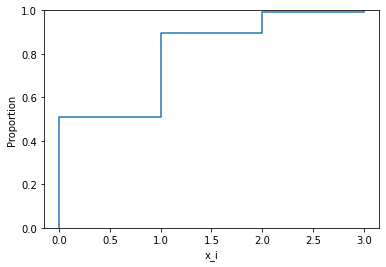

In [48]:
sns.ecdfplot(data=df,  x='x_i', weights='p_i')

#### Найти математическое ожидание и среднее квадратичное отклонение числа РЛС

In [54]:
mean = binom.mean(n, p, loc=0)
var = binom.var(n, p, loc=0)
std = binom.std(n, p, loc=0)

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean', 'var', 'std'])

,mean,var,std
0,0.6000,0.4800,0.6928


#### Найти вероятность того, что их будет не менее двух.

In [57]:
round(1 - binom.cdf(1.999, n, p, loc=0), 4)

0.104

## Задача 3. 

Опыт состоит из трех независимых подбрасываний одновременно трех монет, каждая из которых с одинаковой вероятностью падает гербом или цифрой вверх.

Построить ряд распределения, найти функцию распределения, математическое ожидание и среднее квадратичное отклонение числа одновременного выпадения двух гербов.

Найти вероятность того, что два герба одновременно выпадут хотя бы один раз.

#### Построить ряд распределения

In [91]:
n = 3
p = 0.5

two_heads_prob = binom.pmf(2, n, p) # находим вероятность, что при подбрасывании 3 монет, появится ровно 2 герба 

two_heads_prob

0.375

In [92]:
p_i = [round(binom.pmf(x, n, two_heads_prob), 4) for x in range(0, n+1)]

df = pd.DataFrame({'x_i':np.arange(0, 4), 'p_i':p_i})

df

,x_i,p_i
0,0,0.2441
1,1,0.4395
2,2,0.2637
3,3,0.0527


#### Найти функцию распределения

In [93]:
df['cumulative'] = df['p_i'].cumsum()

df

,x_i,p_i,cumulative
0,0,0.2441,0.2441
1,1,0.4395,0.6836
2,2,0.2637,0.9473
3,3,0.0527,1.0000


<AxesSubplot:xlabel='x_i', ylabel='Proportion'>

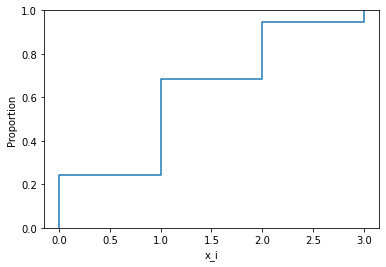

In [94]:
sns.ecdfplot(data=df,  x='x_i', weights='p_i')

#### Найти математическое ожидание и среднее квадратичное отклонение числа

In [96]:
mean, var = binom.stats(3, two_heads_prob, loc=0, moments='mv')

std = np.sqrt(var)

pd.DataFrame(data=[[mean, var, std]], 
             columns=['mean', 'var', 'std'])

,mean,var,std
0,1.125,0.703125,0.8385


#### Найти вероятность того, что два герба одновременно выпадут хотя бы один раз.

In [99]:
round(1 - binom.cdf(0.9, 3, two_heads_prob, loc=0), 4)

0.7559

# Задача 4.

В Банк послупило 6 заявлений от физических лиц на получение кредита. Вероятность получить первый кредит для каждого равна 0.75. Найти вероятности следующих событий:
1) будет выдано ровно 3 кредита;

2) будет выдано не менее двух кредитов

In [10]:
n = 6
p = 0.75

x_0 = binom.pmf(0, n, p)
x_1 = binom.pmf(1, n, p)
x_2 = binom.pmf(2, n, p)
x_3 = binom.pmf(3, n, p)
x_4 = binom.pmf(4, n, p)
x_5 = binom.pmf(5, n, p)
x_6 = binom.pmf(6, n, p)

pd.DataFrame(data=[[x_0, x_1, x_2, x_3, x_4, x_5, x_6]], 
             columns=['0 Заявлений', '1 Заявление', '2 Заявления', '3 Заявления', '4 Заявления', '5 Заявлений', '6 Заявлений'])

,0 Заявлений,1 Заявление,2 Заявления,3 Заявления,4 Заявления,5 Заявлений,6 Заявлений
0,0.0002,0.0044,0.0330,0.1318,0.2966,0.3560,0.1780


In [3]:
df = pd.DataFrame({'x_i':np.arange(0, 7), 'p_i':[x_0, x_1, x_2, x_3, x_4, x_5, x_6]})

df

,x_i,p_i
0,0,0.0002
1,1,0.0044
2,2,0.0330
3,3,0.1318
4,4,0.2966
5,5,0.3560
6,6,0.1780


In [4]:
df['cumulative'] = df['p_i'].cumsum()

df

,x_i,p_i,cumulative
0,0,0.0002,0.0002
1,1,0.0044,0.0046
2,2,0.0330,0.0376
3,3,0.1318,0.1694
4,4,0.2966,0.4661
5,5,0.3560,0.8220
6,6,0.1780,1.0000


<AxesSubplot:xlabel='x_i', ylabel='Proportion'>

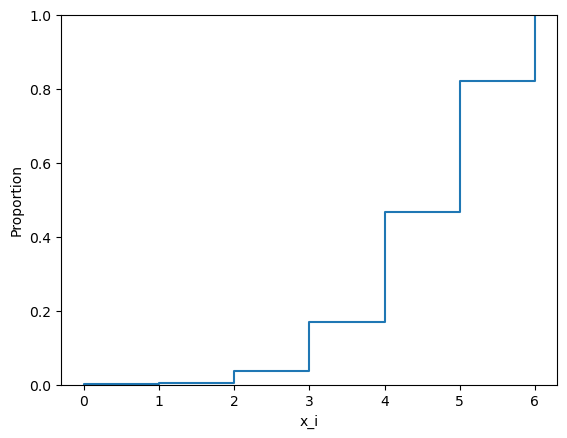

In [5]:
sns.ecdfplot(data=df,  x='x_i', weights='p_i')

1) будет выдано ровно 3 кредита;


In [16]:
binom.pmf(3, n, p, loc=0)

0.13183593749999992

2) будет выдано не менее двух кредитов

In [18]:
binom.sf(2, n, p, loc=0)

0.96240234375